All libraries imported successfully.


Saving Weather Data Set.csv to Weather Data Set (13).csv
Shape: (145460, 23)
Data Types:
 Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object
Head:
          Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2010-04-30  Adelaide     10.8     21.2       0.0          1.8      6.60   
1  2014-07-22  Adelaide      3.7     19.0       0.0          1.4      7.61   
2  2014-07-23  Adelaide      9.6     15.8       0.0          2.6      7.61   
3 

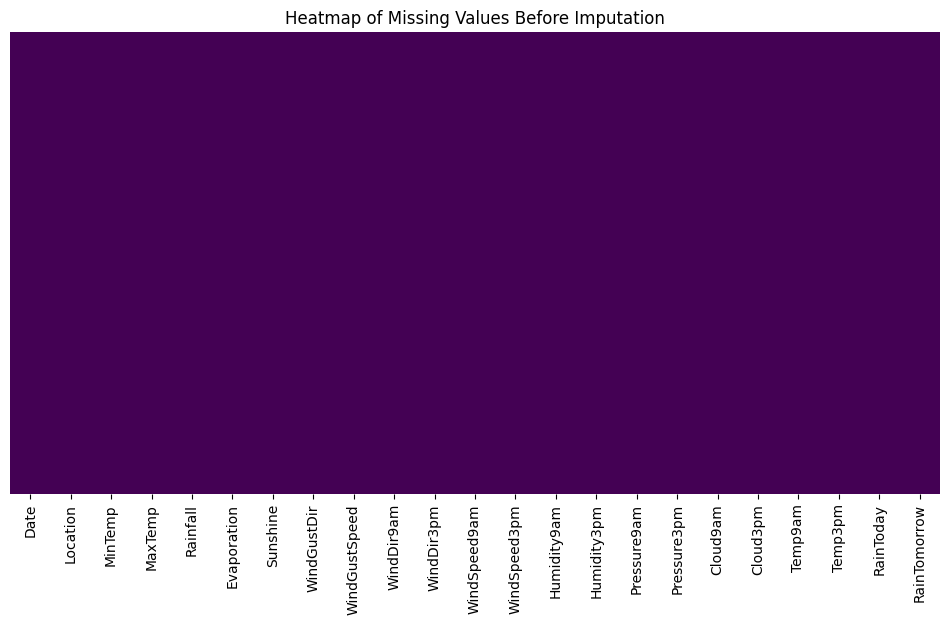

No missing values to plot before imputation.
Missing After Imputation:
 Series([], dtype: float64)


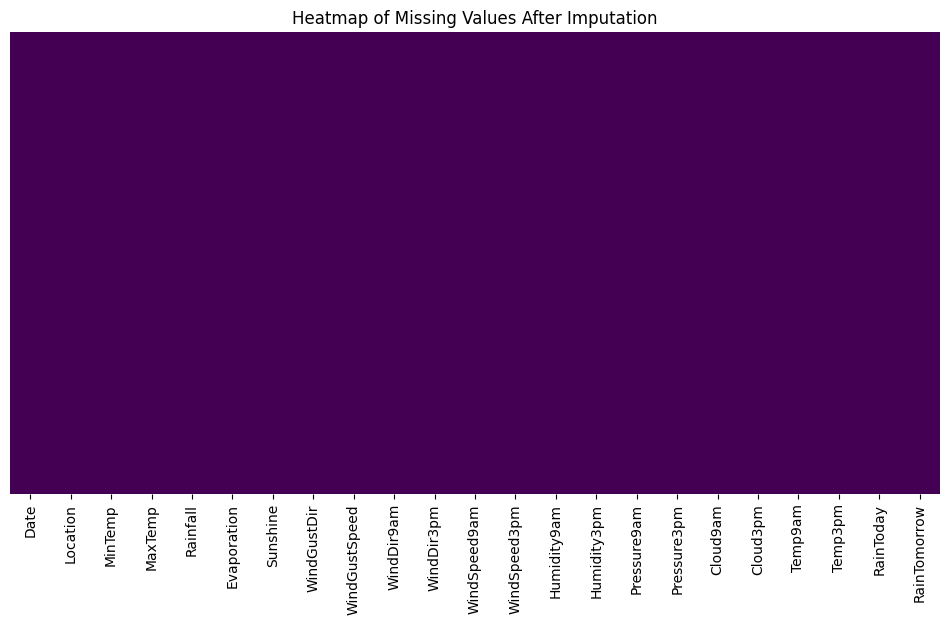

No missing values to plot after imputation.
Data cleaning completed. DataFrame shape: (145460, 23)
Cleaned data saved as 'cleaned_weather_data.csv'
Outlier Counts:
 {'MinTemp': np.int64(82), 'MaxTemp': np.int64(544), 'Rainfall': np.int64(23723), 'Evaporation': np.int64(29631), 'Sunshine': np.int64(45567), 'WindGustSpeed': np.int64(5523), 'WindSpeed9am': np.int64(1817), 'WindSpeed3pm': np.int64(2523), 'Humidity9am': np.int64(1425), 'Humidity3pm': np.int64(0), 'Pressure9am': np.int64(2758), 'Pressure3pm': np.int64(2524), 'Cloud9am': np.int64(0), 'Cloud3pm': np.int64(4974), 'Temp9am': np.int64(307), 'Temp3pm': np.int64(988)}
Before Mean/Median (Rainfall):
 2.3608975663412624 0.0


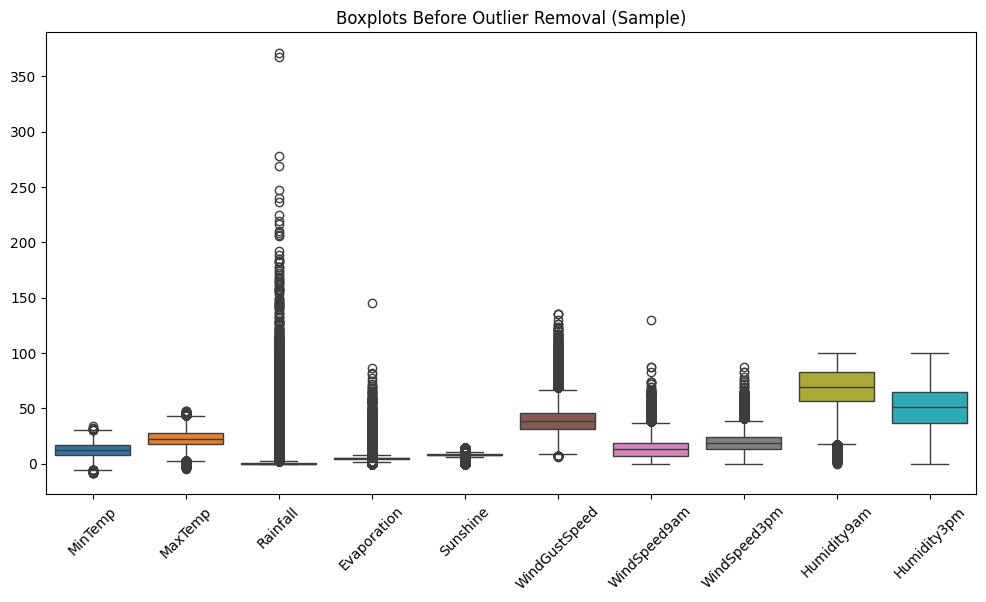

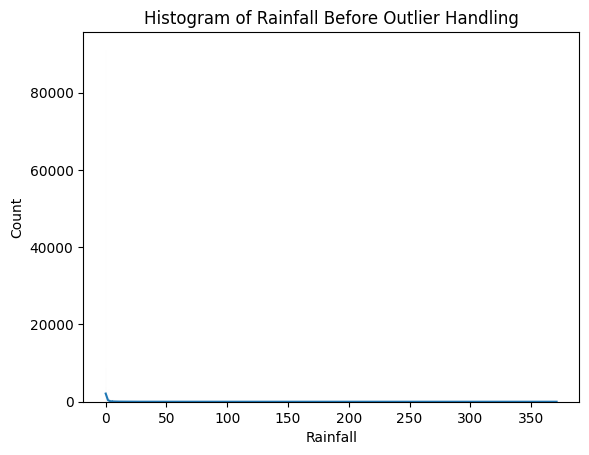

After Mean/Median (Rainfall):
 0.6144820569228654 0.0


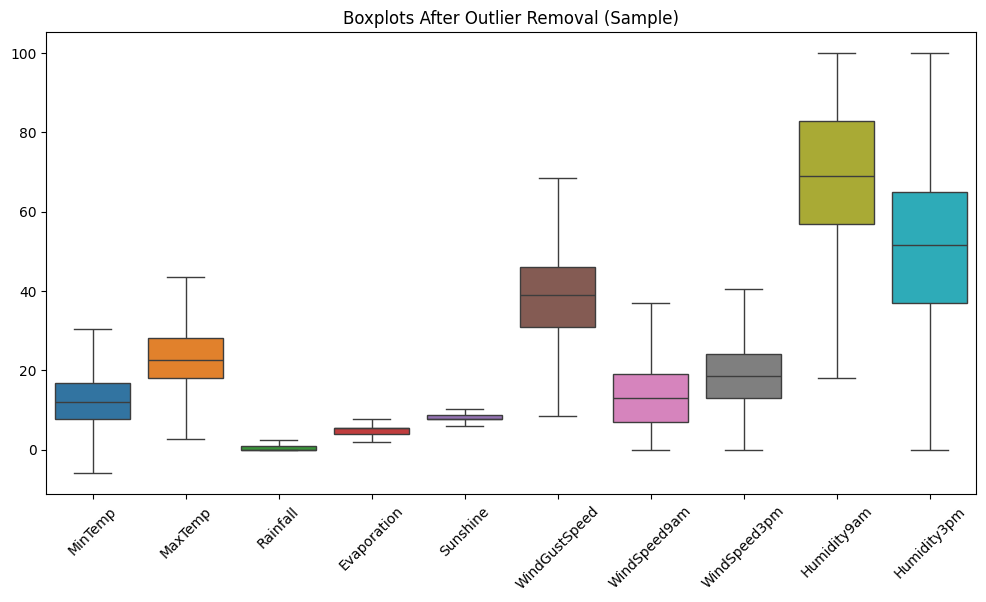

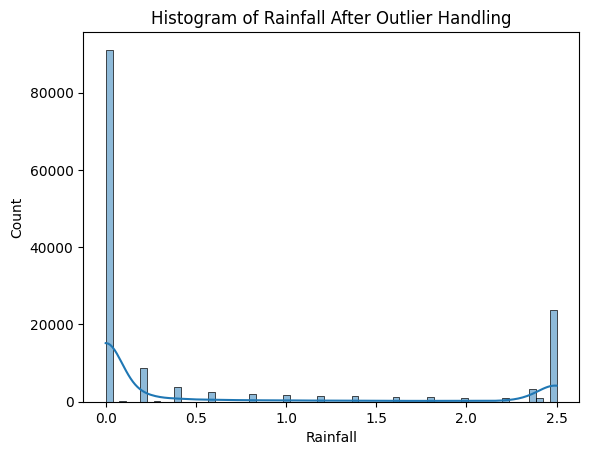

Outlier handling completed.
Data after outlier removal saved as 'outliers_removed_weather_data.csv'
Unique Values:
 {'Date': 3436, 'Location': 49, 'WindGustDir': 16, 'WindDir9am': 16, 'WindDir3pm': 16}
WindGustDir vs. RainTomorrow:
 RainTomorrow     No   Yes
WindGustDir              
E              7831  1350
ENE            6816  1288
ESE            6172  1200
N              6861  2452
NE             5814  1319
NNE            5067  1481
NNW            4757  1863
NW             5838  2284
S              7151  2017
SE             7685  1733
SSE            7461  1755
SSW            6839  1897
SW             7163  1804
W             15167  5074
WNW            5977  2275
WSW            6984  2085


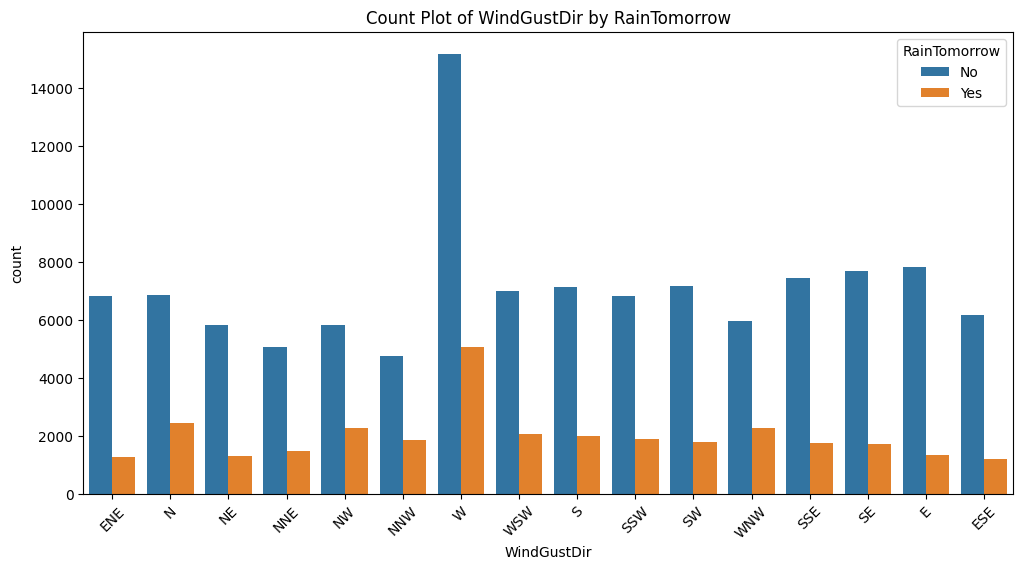

Correlations with Target:
 RainTomorrow     1.000000
Humidity3pm      0.433179
Rainfall         0.314543
RainToday        0.305744
Cloud3pm         0.299239
Humidity9am      0.252245
Cloud9am         0.249960
WindGustSpeed    0.216455
WindSpeed9am     0.084858
MinTemp          0.082181
Name: RainTomorrow, dtype: float64


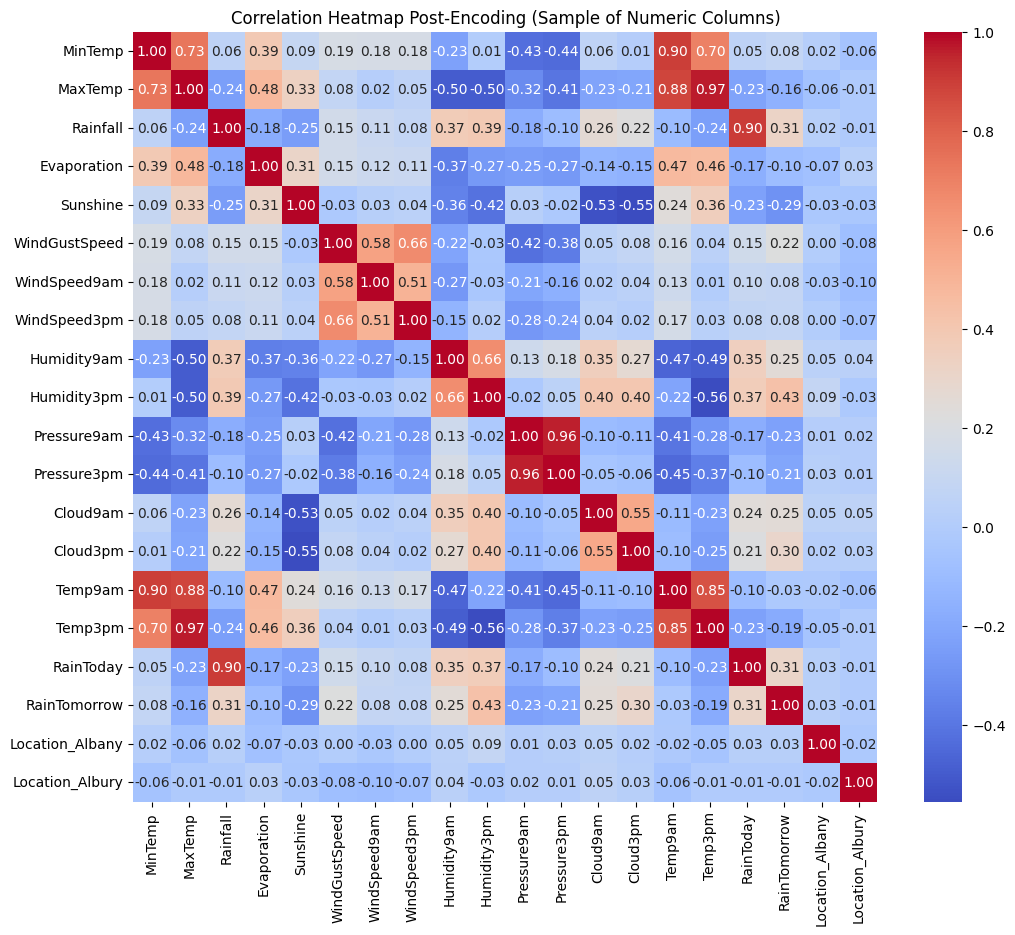

Encoding completed.
Encoded data saved as 'encoded_weather_data.csv'
New Features Correlations with Target:
 TempDiff      -0.329464
HumidityAvg    0.380709
Year          -0.014141
Month          0.007674
Name: RainTomorrow, dtype: float64
HumidityAvg Describe:
 count    145460.000000
mean         60.235867
std          17.842480
min           9.000000
25%          49.000000
50%          61.000000
75%          73.000000
max         100.000000
Name: HumidityAvg, dtype: float64


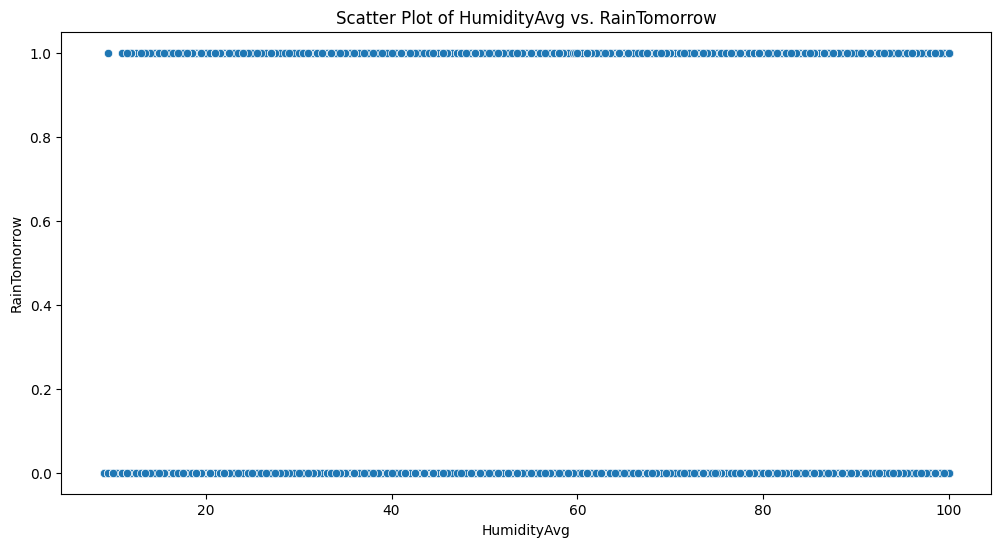

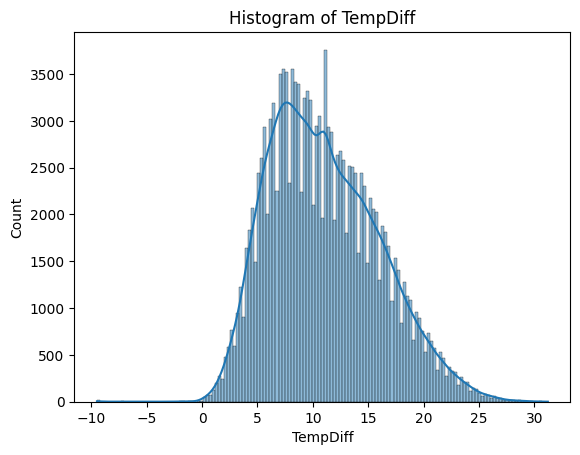

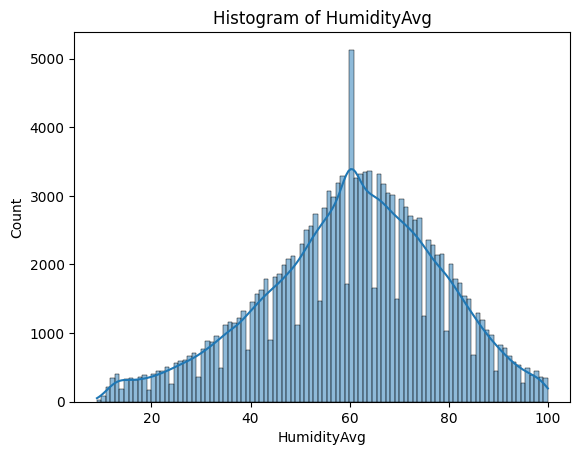

Column Year is not numeric, cannot plot histogram.
Column Month is not numeric, cannot plot histogram.
Feature engineering completed.
Engineered data saved as 'engineered_weather_data.csv'
Variance Before Scaling (Sample):
 MinTemp        40.506464
MaxTemp        49.950494
Rainfall        0.976881
Evaporation     2.927519
Sunshine        1.926679
dtype: float64


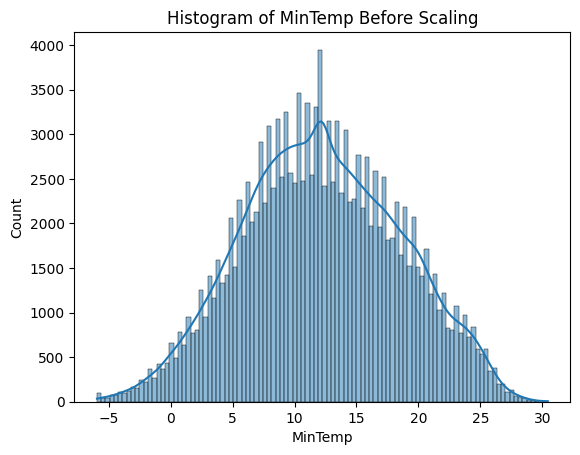

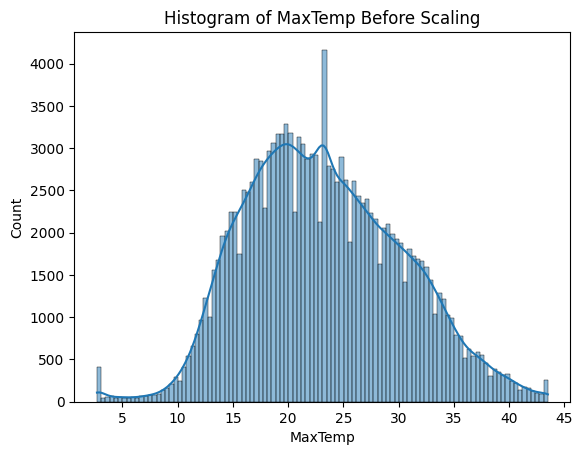

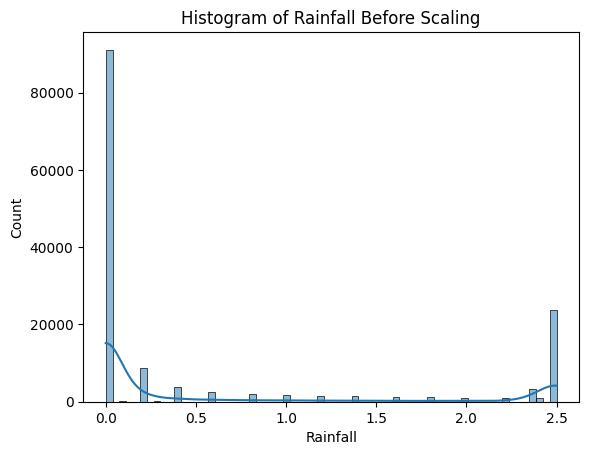

Numerical features scaled.
Variance After Scaling (Sample):
 MinTemp        1.000007
MaxTemp        1.000007
Rainfall       1.000007
Evaporation    1.000007
Sunshine       1.000007
dtype: float64
Scaled Correlations with Target:
 MinTemp        0.082181
MaxTemp       -0.156641
Rainfall       0.314543
Evaporation   -0.096391
Sunshine      -0.293887
Name: RainTomorrow, dtype: float64


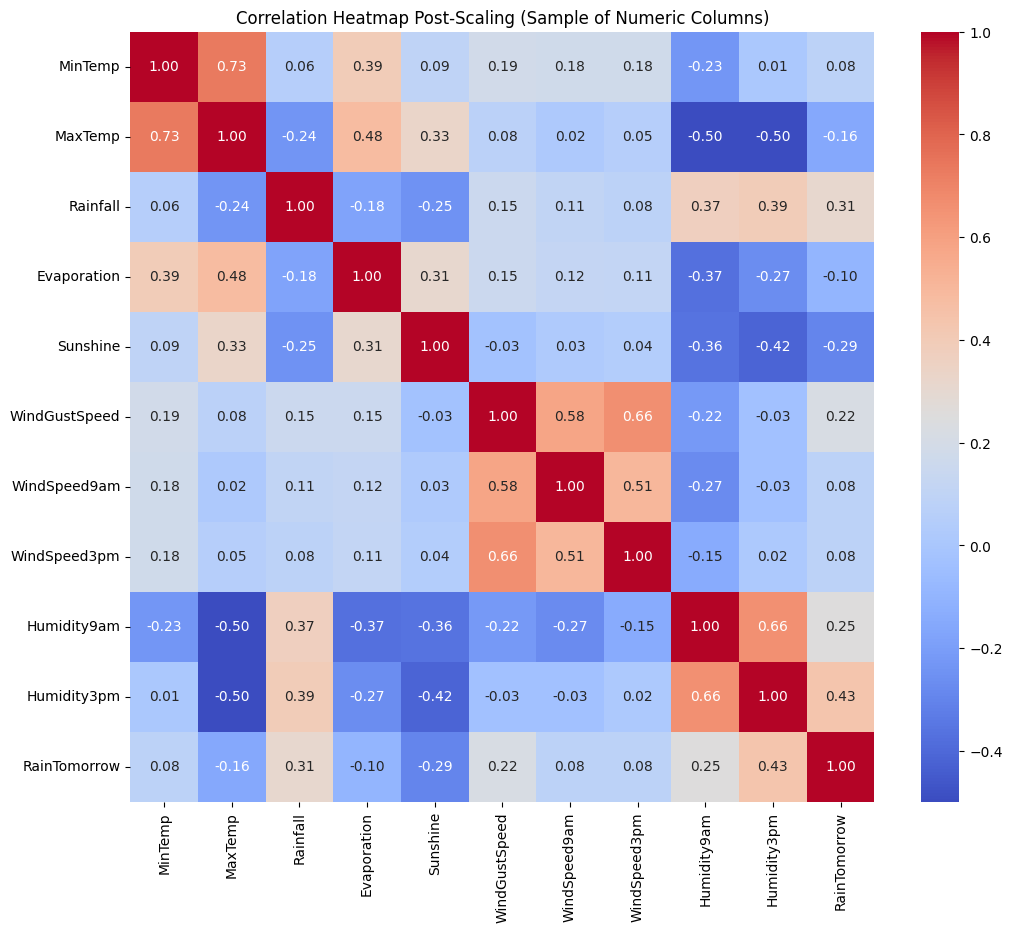

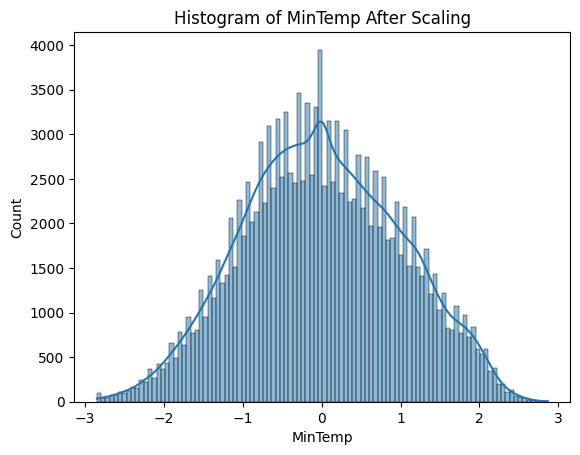

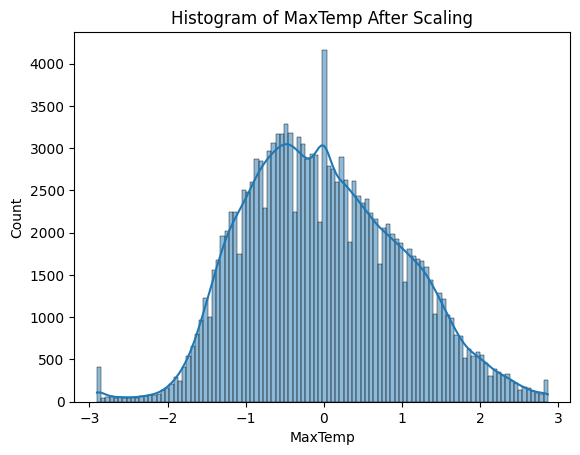

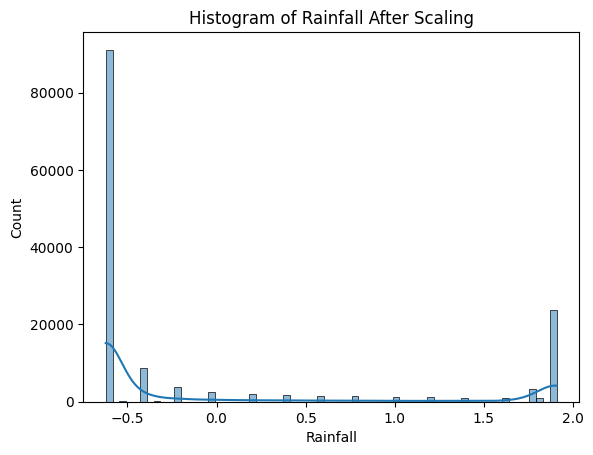

Feature scaling completed.
Scaled data saved as 'scaled_weather_data.csv'
Original Train Distribution:
 RainTomorrow
0    0.78085
1    0.21915
Name: proportion, dtype: float64


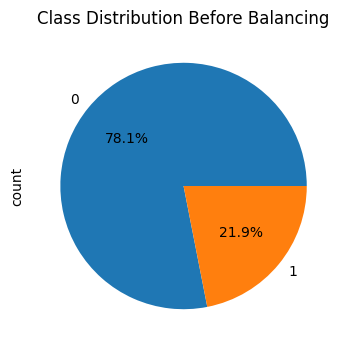

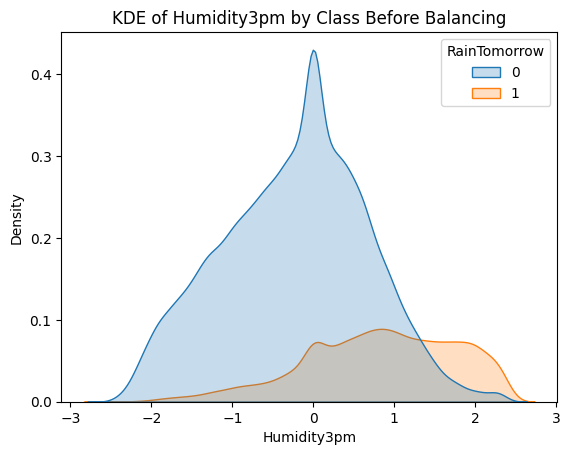

Balanced Train Distribution:
 RainTomorrow
0    0.5
1    0.5
Name: proportion, dtype: float64


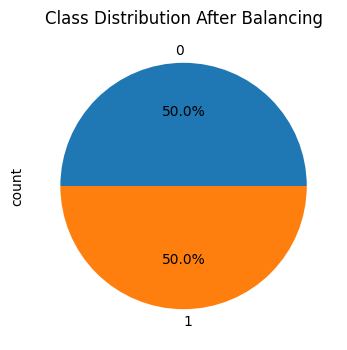

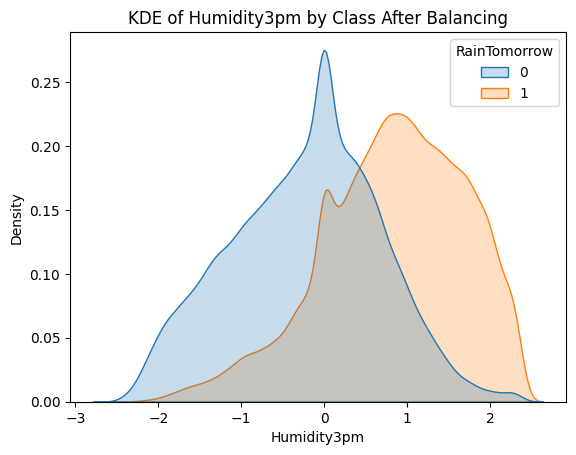

Balanced training data and test data saved.
All preprocessing steps completed successfully!


In [23]:
# Initial Imports (Run This First)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

print("All libraries imported successfully.")

# Data loading
# Note: For Google Colab, uncomment the following lines:
# from google.colab import files
# uploaded = files.upload()

#Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Initial inspection
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Head:\n", df.head())
print("Describe:\n", df.describe())

# Member 1: Data Loading and Handling Missing Values
# Parse Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# EDA: Summarize missing value percentages
missing = df.isnull().sum() / len(df) * 100
print("Missing Percentages:\n", missing[missing > 0].sort_values(ascending=False))

# Analyze patterns (e.g., missingness by Location or RainTomorrow)
# Using .apply with groupby can sometimes cause issues, especially with older pandas versions or certain operations.
# Let's try an alternative way to check missing by location for a specific column like Rainfall
print("Missing Rainfall by Location:\n", df.groupby('Location')['Rainfall'].apply(lambda x: x.isnull().sum()))
print("Missing where RainTomorrow='Yes':\n", df[df['RainTomorrow'] == 'Yes'].isnull().sum())


# Visualizations - Before Imputation
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values Before Imputation')
plt.show()

# Plot missing percentages before imputation only if there are any
if not missing[missing > 0].empty:
    missing[missing > 0].plot(kind='bar')
    plt.title('Bar Plot of Missing Percentages Before Imputation')
    plt.ylabel('Percentage Missing')
    plt.show()
else:
    print("No missing values to plot before imputation.")


# Preprocessing: Handle missing values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Ensure 'RainTomorrow' and 'RainToday' are not included in categorical imputation if they exist and are not objects
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
cols_to_exclude_from_cat_imputation = ['RainTomorrow', 'RainToday']
categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude_from_cat_imputation]


# Impute numerical with median, categorical with mode
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Drop if >50% missing (unlikely here)
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Verify missing values after imputation
missing_after_imputation = df.isnull().sum() / len(df) * 100
print("Missing After Imputation:\n", missing_after_imputation[missing_after_imputation > 0].sort_values(ascending=False))


# Visualizations - After Imputation
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values After Imputation')
plt.show()

# Only attempt to plot if there are missing values after imputation
if not missing_after_imputation[missing_after_imputation > 0].empty:
    missing_after_imputation[missing_after_imputation > 0].plot(kind='bar')
    plt.title('Bar Plot of Missing Percentages After Imputation')
    plt.ylabel('Percentage Missing')
    plt.show()
else:
    print("No missing values to plot after imputation.")


print("Data cleaning completed. DataFrame shape:", df.shape)

# Save the cleaned dataframe for the next member
df.to_csv('cleaned_weather_data.csv', index=False)
print("Cleaned data saved as 'cleaned_weather_data.csv'")


# Member 2: Removing Outliers
# EDA: Calculate outlier counts (using IQR)
# Re-identify numerical columns as they might have changed after cleaning/dropping
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts[col] = outliers
print("Outlier Counts:\n", outlier_counts)

# Compare distributions before
if 'Rainfall' in df.columns:
    print("Before Mean/Median (Rainfall):\n", df['Rainfall'].mean(), df['Rainfall'].median())

# Visualizations (before)
# Select only numerical columns for boxplots
numerical_cols_for_boxplot = df.select_dtypes(include=np.number).columns.tolist()
if numerical_cols_for_boxplot:
    plt.figure(figsize=(12, 6))
    # Take a sample of columns if there are too many
    cols_to_plot = numerical_cols_for_boxplot[:10] # Adjust number as needed
    sns.boxplot(data=df[cols_to_plot])
    plt.title('Boxplots Before Outlier Removal (Sample)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No numerical columns to plot boxplots.")

if 'Rainfall' in df.columns:
    sns.histplot(df['Rainfall'], kde=True)
    plt.title('Histogram of Rainfall Before Outlier Handling')
    plt.show()

# Preprocessing: Remove/clip outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)  # Clip to avoid data loss

# EDA after: Compare distributions
if 'Rainfall' in df.columns:
    print("After Mean/Median (Rainfall):\n", df['Rainfall'].mean(), df['Rainfall'].median())

# Visualizations (after)
if numerical_cols_for_boxplot:
    plt.figure(figsize=(12, 6))
    # Use the same sample of columns as before
    sns.boxplot(data=df[cols_to_plot])
    plt.title('Boxplots After Outlier Removal (Sample)')
    plt.xticks(rotation=45)
    plt.show()
else:
     print("No numerical columns to plot boxplots after outlier handling.")


if 'Rainfall' in df.columns:
    sns.histplot(df['Rainfall'], kde=True)
    plt.title('Histogram of Rainfall After Outlier Handling')
    plt.show()

print("Outlier handling completed.")

# Save the dataframe after outlier removal
df.to_csv('outliers_removed_weather_data.csv', index=False)
print("Data after outlier removal saved as 'outliers_removed_weather_data.csv'")


# Member 3: Encoding Categorical Variables
# Load data from previous step
df = pd.read_csv('outliers_removed_weather_data.csv')

# EDA: Count unique values
# Re-identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Exclude target from unique value count if it's still an object
cols_to_exclude_from_unique = ['RainTomorrow', 'RainToday'] # RainToday might be object or int
categorical_cols_for_unique = [col for col in categorical_cols if col not in cols_to_exclude_from_unique]

print("Unique Values:\n", {col: df[col].nunique() for col in categorical_cols_for_unique})

# Check distribution vs. RainTomorrow (if RainTomorrow is still an object)
if 'WindGustDir' in df.columns and 'RainTomorrow' in df.columns and df['RainTomorrow'].dtype == 'object':
    print("WindGustDir vs. RainTomorrow:\n", pd.crosstab(df['WindGustDir'], df['RainTomorrow']))

# Visualizations
if 'WindGustDir' in df.columns and 'RainTomorrow' in df.columns and df['RainTomorrow'].dtype == 'object':
    plt.figure(figsize=(12, 6))
    sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df)
    plt.title('Count Plot of WindGustDir by RainTomorrow')
    plt.xticks(rotation=45)
    plt.show()

# Preprocessing: Encoding
# Binary for RainToday - handle if it's still an object
if 'RainToday' in df.columns and df['RainToday'].dtype == 'object':
    df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

# One-hot for nominal - ensure columns exist before encoding
cols_to_encode = [col for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'] if col in df.columns]

if cols_to_encode:
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_data = encoder.fit_transform(df[cols_to_encode])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_to_encode))

    # Drop original categorical columns before concatenation
    df = df.drop(cols_to_encode, axis=1)
    # Concatenate the original DataFrame with the encoded DataFrame
    df = pd.concat([df, encoded_df], axis=1)

# Encode target 'RainTomorrow' - handle if it's still an object
if 'RainTomorrow' in df.columns and df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# EDA after: Correlation of new dummies
if 'RainTomorrow' in df.columns:
    # Drop non-numeric columns like 'Date' before calculating correlation
    df_for_corr = df.select_dtypes(include=np.number)
    if 'RainTomorrow' in df_for_corr.columns:
        corr = df_for_corr.corr()['RainTomorrow'].sort_values(ascending=False)
        print("Correlations with Target:\n", corr.head(10))
    else:
        print("'RainTomorrow' not found in numeric columns for correlation calculation.")


# Visualizations after
if cols_to_encode and 'RainTomorrow' in df.columns:
    plt.figure(figsize=(12, 10))
    # Select only numeric columns for correlation heatmap
    numeric_cols_after_encoding = df.select_dtypes(include=np.number).columns.tolist()
    # Take a subset of numeric columns for heatmap if the number is large
    cols_for_heatmap = numeric_cols_after_encoding[:20] # Adjust number as needed

    if cols_for_heatmap:
        # Ensure all selected columns exist in df
        cols_for_heatmap_exist = [col for col in cols_for_heatmap if col in df.columns]
        if cols_for_heatmap_exist:
             sns.heatmap(df[cols_for_heatmap_exist].corr(), annot=True, cmap='coolwarm', fmt=".2f")
             plt.title('Correlation Heatmap Post-Encoding (Sample of Numeric Columns)')
             plt.show()
        else:
             print("None of the selected sample numeric columns exist in the DataFrame for heatmap.")

    else:
        print("Not enough numeric columns to display heatmap after encoding.")

print("Encoding completed.")

# Save the encoded dataframe for the next member
df.to_csv('encoded_weather_data.csv', index=False)
print("Encoded data saved as 'encoded_weather_data.csv'")


# Member 4: Feature Engineering
# Load data from previous step
df = pd.read_csv('encoded_weather_data.csv')

# Preprocessing: Create new features
if 'MaxTemp' in df.columns and 'MinTemp' in df.columns:
    df['TempDiff'] = df['MaxTemp'] - df['MinTemp']

if 'Humidity9am' in df.columns and 'Humidity3pm' in df.columns:
    df['HumidityAvg'] = (df['Humidity9am'] + df['Humidity3pm']) / 2

# Assuming 'Date' column was kept and is in datetime format from previous steps
# If 'Date' was dropped, re-load original data or adapt this step
if 'Date' in df.columns:
     # Ensure 'Date' is datetime if it wasn't saved as such
     df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
     df['Year'] = df['Date'].dt.year
     df['Month'] = df['Date'].dt.month
     df = df.drop('Date', axis=1)  # Drop original Date column after extracting features

# EDA: Analyze new features' correlations
new_features = [col for col in ["TempDiff", 'HumidityAvg', 'Year', 'Month'] if col in df.columns]

if new_features and 'RainTomorrow' in df.columns:
    # Select only numeric columns for correlation calculation
    df_numeric = df.select_dtypes(include=np.number)
    if 'RainTomorrow' in df_numeric.columns:
        # Ensure new features are also numeric
        new_numeric_features = [col for col in new_features if col in df_numeric.columns]
        if new_numeric_features:
            corr_new = df_numeric[new_numeric_features + ['RainTomorrow']].corr()['RainTomorrow'].drop('RainTomorrow', errors='ignore')
            print("New Features Correlations with Target:\n", corr_new)
        else:
            print("New features are not numeric and cannot be used for correlation calculation.")
    else:
        print("'RainTomorrow' not found in numeric columns for correlation calculation.")


# Assess impact on distribution
if "HumidityAvg" in df.columns:
    print("HumidityAvg Describe:\n", df["HumidityAvg"].describe())

# Visualizations
if "HumidityAvg" in df.columns and 'RainTomorrow' in df.columns:
    # Scatter plot requires numeric columns
    if df['HumidityAvg'].dtype in [np.float64, np.int64] and df['RainTomorrow'].dtype in [np.float64, np.int64]:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='HumidityAvg', y='RainTomorrow', data=df)
        plt.title('Scatter Plot of HumidityAvg vs. RainTomorrow')
        plt.show()
    else:
        print("HumidityAvg or RainTomorrow is not numeric, cannot plot scatter plot.")


for col in new_features:
    if col in df.columns:
         # Check if the column is numeric before plotting histogram
         if df[col].dtype in [np.float64, np.int64]:
            sns.histplot(df[col], kde=True)
            plt.title(f'Histogram of {col}')
            plt.show()
         else:
            print(f"Column {col} is not numeric, cannot plot histogram.")


print("Feature engineering completed.")

# Save the dataframe after feature engineering
df.to_csv('engineered_weather_data.csv', index=False)
print("Engineered data saved as 'engineered_weather_data.csv'")


# Member 5: Scaling Features
# Load data from previous step
df = pd.read_csv('engineered_weather_data.csv')

# Identify numerical cols (updated after encoding/engineering)
# Ensure 'RainTomorrow' is excluded from scaling if it exists and is numeric
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'RainTomorrow' in numerical_cols:
    numerical_cols.remove('RainTomorrow')


# EDA: Compare variance/std before
if numerical_cols:
    print("Variance Before Scaling (Sample):\n", df[numerical_cols[:5]].var())

# Visualizations before
if numerical_cols:
    for col in numerical_cols[:3]:  # Sample
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col} Before Scaling')
        plt.show()
else:
    print("No numerical columns to plot histograms before scaling.")


# Preprocessing: Scaling
if numerical_cols:
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("Numerical features scaled.")
else:
    print("No numerical columns to scale.")


# EDA after: Variance/std after (should be ~1)
if numerical_cols:
    print("Variance After Scaling (Sample):\n", df[numerical_cols[:5]].var())

# Check scaled correlations
if 'RainTomorrow' in df.columns and numerical_cols:
    # Select only numeric columns for correlation
    df_numeric_scaled = df.select_dtypes(include=np.number)
    if 'RainTomorrow' in df_numeric_scaled.columns:
        # Ensure selected numerical_cols for correlation exist and are numeric
        scaled_cols_for_corr = [col for col in numerical_cols[:5] + ['RainTomorrow'] if col in df_numeric_scaled.columns]
        if scaled_cols_for_corr:
            corr_scaled = df_numeric_scaled[scaled_cols_for_corr].corr()['RainTomorrow'].drop('RainTomorrow', errors='ignore')
            print("Scaled Correlations with Target:\n", corr_scaled)
        else:
             print("Selected scaled columns for correlation do not exist or are not numeric.")

    else:
        print("'RainTomorrow' not found in numeric columns for scaled correlation calculation.")


# Visualizations after
if numerical_cols:
    plt.figure(figsize=(12, 10))
    # Select only numeric columns for heatmap
    numeric_cols_after_scaling = df.select_dtypes(include=np.number).columns.tolist()
    # Include RainTomorrow for correlation heatmap if it exists and is numeric
    if 'RainTomorrow' in df.columns and df['RainTomorrow'].dtype in [np.float64, np.int64]:
         cols_for_heatmap_scaled = [col for col in numeric_cols_after_scaling if col != 'RainTomorrow'][:10] + ['RainTomorrow'] # Sample + Target
    else:
         cols_for_heatmap_scaled = numeric_cols_after_scaling[:10] # Sample only

    if cols_for_heatmap_scaled:
        # Ensure all selected columns exist in df
        cols_for_heatmap_scaled_exist = [col for col in cols_for_heatmap_scaled if col in df.columns]
        if cols_for_heatmap_scaled_exist:
            sns.heatmap(df[cols_for_heatmap_scaled_exist].corr(), annot=True, cmap='coolwarm', fmt=".2f")
            plt.title('Correlation Heatmap Post-Scaling (Sample of Numeric Columns)')
            plt.show()
        else:
            print("None of the selected sample scaled columns exist in the DataFrame for heatmap.")

    else:
        print("Not enough numeric columns to display heatmap after scaling.")


if numerical_cols:
    for col in numerical_cols[:3]: # Sample
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col} After Scaling')
        plt.show()
else:
    print("No numerical columns to plot histograms after scaling.")


print("Feature scaling completed.")

# Save the dataframe after scaling
df.to_csv('scaled_weather_data.csv', index=False)
print("Scaled data saved as 'scaled_weather_data.csv'")


# Member 6: Balancing Dataset
# Load data from previous step
df = pd.read_csv('scaled_weather_data.csv')


# Split to apply SMOTE only on train (good practice)
if 'RainTomorrow' in df.columns:
    X = df.drop('RainTomorrow', axis=1)
    y = df['RainTomorrow']

    # Check if the target variable is suitable for stratification (needs at least two classes)
    if y.nunique() >= 2:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # EDA: Original imbalance
        print("Original Train Distribution:\n", y_train.value_counts(normalize=True))

        # Visualizations before
        plt.figure(figsize=(6, 4))
        y_train.value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Class Distribution Before Balancing')
        plt.show()

        # Check if 'Humidity3pm' exists and is numeric before plotting KDE
        if 'Humidity3pm' in X_train.columns and X_train['Humidity3pm'].dtype in [np.float64, np.int64]:
            temp_df = pd.concat([X_train, y_train], axis=1)
            sns.kdeplot(data=temp_df, x='Humidity3pm', hue='RainTomorrow', fill=True)
            plt.title('KDE of Humidity3pm by Class Before Balancing')
            plt.show()
        else:
            print("Cannot plot KDE for Humidity3pm by class before balancing (column not found or not numeric).")


        # Preprocessing: Balancing with SMOTE (on train)
        # Check if X_train contains only numeric data, SMOTE requires numeric input
        if X_train.select_dtypes(exclude=np.number).empty:
            smote = SMOTE(sampling_strategy='auto', random_state=42)  # Auto for 50:50
            X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

            # EDA after: Confirm 50:50
            print("Balanced Train Distribution:\n", y_train_bal.value_counts(normalize=True))

            # Visualizations after
            plt.figure(figsize=(6, 4))
            y_train_bal.value_counts().plot(kind='pie', autopct='%1.1f%%')
            plt.title('Class Distribution After Balancing')
            plt.show()

            # Recombine for viz (temp df) - ensure all columns are numeric
            df_bal = pd.concat([X_train_bal, y_train_bal], axis=1)
            if 'Humidity3pm' in df_bal.columns and df_bal['Humidity3pm'].dtype in [np.float64, np.int64]:
                 sns.kdeplot(data=df_bal, x='Humidity3pm', hue='RainTomorrow', fill=True)
                 plt.title('KDE of Humidity3pm by Class After Balancing')
                 plt.show()
            else:
                 print("Cannot plot KDE for Humidity3pm by class after balancing (column not found or not numeric).")


            # Save balanced train/test if needed
            pd.concat([X_train_bal, y_train_bal], axis=1).to_csv('balanced_train.csv', index=False)
            X_test.to_csv('test_features.csv', index=False)
            y_test.to_csv('test_labels.csv', index=False)
            print("Balanced training data and test data saved.")

        else:
            print("X_train contains non-numeric columns. SMOTE requires all numeric input.")
            print("Non-numeric columns in X_train:", X_train.select_dtypes(exclude=np.number).columns.tolist())

    else:
        print("Target variable 'RainTomorrow' does not have at least two classes for stratification.")

else:
    print("'RainTomorrow' column not found in the DataFrame. Cannot perform dataset balancing.")


print("All preprocessing steps completed successfully!")